# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [202]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
# define output dataset 
y = np.array([[0,0,1,1]]).T

In [203]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,4)) - 1

# define syn1
syn1 = 2*np.random.random((4,1)) - 1

iter = 0

#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）
syn0_history = [syn0]
syn1_history = [syn1]
l1_error_history = []
l2_error_history = []

 * l1 =  x(4,3) dot syn0(3,1)  -> (4,1)




 * l1 =  x(4,3) dot syn0(3,4)  -> (4,4)
 * l2 = l1(4,4) dot syn1(4,1)   ->(4,1)





 * l1 =  x(4,3) dot syn0(3,4)   ->(4,4)
 * l2 = l1(4,4) dot syn1(4,4)   ->(4,4)
 * l3 = l2(4,4) dot syn2(4,1)   ->(4,1)
 
 

In [204]:
syn0

array([[-0.16595599,  0.44064899, -0.99977125, -0.39533485],
       [-0.70648822, -0.81532281, -0.62747958, -0.30887855],
       [-0.20646505,  0.07763347, -0.16161097,  0.370439  ]])

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [205]:
for iter in range(1000):
    # forward propagation
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
    
    #先算出l2的誤差，再反向傳播
    l2_error = y - l2
    l2_delta = l2_error * nonlin(l2,deriv=True)
    
    l1_error = l2_delta.dot(syn1.T)
    l1_delta = l1_error * nonlin(l1,True)

    #l1_error = y - l1
  

    # update weights
    syn0 += np.dot(l0.T,l1_delta)
    syn1 += np.dot(l1.T,l2_delta)
    
    l1_error_history.append(l1_error)
    l2_error_history.append(l2_error)
    
print("Output After Training:")
print(l1)
print("\n\n")
print(l2)


Output After Training:
[[ 0.61210757  0.26068968  0.82645679  0.60195209]
 [ 0.49869476  0.17189637  0.82785085  0.53707288]
 [ 0.17038107  0.93152867  0.08076609  0.61144676]
 [ 0.11462657  0.88899855  0.08149298  0.54695037]]



[[ 0.01860094]
 [ 0.01514467]
 [ 0.98184927]
 [ 0.97979709]]


 # 拿其中一個 error出來準備作圖

In [206]:
l1_error_history = np.array(l1_error_history)
l1_error_history = np.hstack(l1_error_history[:,0,0])
#l1_error_history

In [207]:
l2_error_history = np.array(l2_error_history)
l2_error_history = np.hstack(l2_error_history[:,0:1])
l2_error_history = np.hstack(l2_error_history)
#l2_error_history

In [208]:
print("Output After Training:")
print("\n")
print(l1)
print("\n\n")
print(l2)

Output After Training:


[[ 0.61210757  0.26068968  0.82645679  0.60195209]
 [ 0.49869476  0.17189637  0.82785085  0.53707288]
 [ 0.17038107  0.93152867  0.08076609  0.61144676]
 [ 0.11462657  0.88899855  0.08149298  0.54695037]]



[[ 0.01860094]
 [ 0.01514467]
 [ 0.98184927]
 [ 0.97979709]]


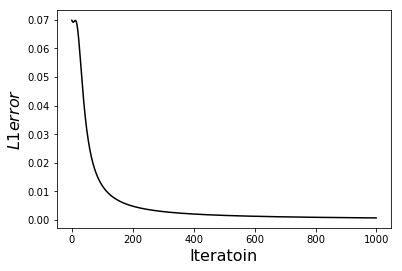

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(l1_error_history, ms=3, lw=1.5, color='black')
plt.xlabel(r'Iteratoin', fontsize=16)
plt.ylabel(r'$L1 error$', fontsize=16)
plt.show()

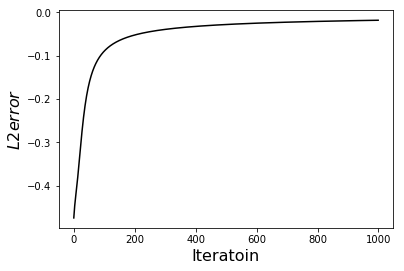

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(l2_error_history, ms=3, lw=1.5, color='black')
plt.xlabel(r'Iteratoin', fontsize=16)
plt.ylabel(r'$L2 error$', fontsize=16)
plt.show()